<a href="https://colab.research.google.com/github/Beatrix-droid/pytorch-tutorial/blob/master/pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Pytorch
```
# This is formatted as code
```



creating a tensor

In [23]:
#creating a tensor:
import torch

x = torch.empty(2,2) # a 2d tensor
print(x)

tensor([[1.4153e-34, 0.0000e+00],
        [3.3631e-44, 0.0000e+00]])


can sue teh rand ne==method to create a tensor with random numbers

In [24]:
#can create tensors from lists as well:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [25]:
#can add tensors as you would normal add ints or concat strings

#can also add one tensor to another:
x = torch.rand(2,2)
y = torch.rand(2,2)
y.add_(x) #add tensor x to y. By defualt any function with a trailing underscore in pytorch will be an inplace operation


#can also divide and multiplu as one normally woukld

tensor([[0.9964, 0.2237],
        [0.7131, 0.5633]])

converting a tensor to a numpy array

In [26]:
import numpy as np

a=torch.ones(5) #a 1d tensor of len 5 full of ones
b = a.numpy() #conver to array
print(a)
print(type(b))
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


converting an array to a tensor

In [27]:
a= np.ones(5) #instantiate the array
b=torch.from_numpy(a) #convert the arary to a pytorch tensor
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


check if you have a cuda toolkit avaialble to do operations on the gpu

In [28]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  x= torch.ones(5, device=device)
  y=torch.ones(5)
  y=y.to(device) #create and move tensors to gpu
#if you now try to use numpy n calling  
  x.numpy()
  #you will get an error because numpy can only handle 
  #cpu tensors so we would have to move it back to the cpu
  x=x.to('cpu')
  

grad = true
when creatinga  tensor in pytorch we can set an optional parameter to True: requires_grad=True  This tells pytorch that it will have to calculate teh gradient of the tensor later on in the computation

In [29]:
x = torch.ones(5, requires_grad=True)

# Autograd Pytorch
calculate gradients to optimize models

In [30]:
x = torch.rand(3)
print(x)

tensor([0.2644, 0.8070, 0.2173])


In [31]:
#say we need ot calculate the gradient of a functionat that point.
#we set requires_grad=True:
x = torch.rand(3, requires_grad=True)



In [32]:
#now do an operation:
y = x+2
print(y) #operation was addition so the grad_funct was add
z = y*y*2
print(z)#operation was mult so the grad_funct was mult
z=z.mean()

tensor([2.6782, 2.7342, 2.3470], grad_fn=<AddBackward0>)
tensor([14.3454, 14.9516, 11.0166], grad_fn=<MulBackward0>)


now when we want to calculate the gradients the only thing that we need to do is call the .backward() method:

In [33]:
z.backward()# will calculate the gradient of z with respect to x so dz/dx

In [34]:
#now x has a grad attribute with teh gradients stored that we can use:

print(x.grad)

tensor([3.5709, 3.6456, 3.1293])


In this case z was a scalar (as z =z.mean()) so we could just implciitly call the backward function on it.

the backward function is based on the chain rule  (jacobain matrix)(vector) = (gradients we are interested in
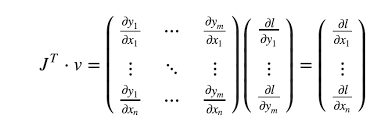


in general if z is a vector you need to pass the value f the vector in the function.Say we had something like:
```
v= torch.tensor([0.1. 1.0, 0.001],dtype=torch.float32)
z = y*y*2 #z is now a bector
z.backward(v)
# This is formatted as code
```



#preventing Pytorch from tracking the history
 (useful when updating weights of a model)

 We have three options on how to do this:
 
 ```
 1) x.requres_grad_(False)
 2) x.detach()
 3) with torch.no_grad():
 ```

In [35]:
#method 1
x.requires_grad_(False)

tensor([0.6782, 0.7342, 0.3470])

In [36]:
#method 2
y = x.detach() #creates a new tensor with teh same values but no gradient
print(y)

tensor([0.6782, 0.7342, 0.3470])


In [37]:
#method 3
with torch.no_grad():
  y = x+2
print(y)

tensor([2.6782, 2.7342, 2.3470])


warning, whenever we call the backward  function then the gradient for the tensors will be accumulated and summed up in the .grad attribute:

In [38]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [39]:
#for the second one the gradients are incorrect. they have neen usmmed up hence 6

#must clear the weights each time:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)
  weights.grad.zero_()#this is the important line

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


#Gradient Descent and constructing a basic pipeline for pytorch
let's see how to optimize paarameters from scracth by using a linear regression model that we will code from scratch

In [40]:
# f = w+x
import numpy as np


X=np.array([1,2,3,4], dtype=np.float32)
Y=np.array([2,4,6,8], dtype=np.float32)

w=0.0

In [41]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula


In [42]:
print(f"prediction before training: f(5)={forward(5)}")

prediction before training: f(5)=0.0


In [43]:
#training
learning_rate = 0.01
n_iters=10

for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  dw=gradient(X,Y, y_pred)

  #update weights
  w=w-learning_rate *dw

  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=1.2, loss = 30.0
prediction after trainingf(5)=6.0
epoch 2: W=1.6799999618530272, loss = 4.799999237060547
prediction after trainingf(5)=8.399999809265136
epoch 3: W=1.871999988555908, loss = 0.7680001854896545
prediction after trainingf(5)=9.35999994277954
epoch 4: W=1.9487999868392942, loss = 0.1228799968957901
prediction after trainingf(5)=9.743999934196472
epoch 5: W=1.9795200133323667, loss = 0.019660834223031998
prediction after trainingf(5)=9.897600066661834
epoch 6: W=1.9918080282211301, loss = 0.0031457357108592987
prediction after trainingf(5)=9.95904014110565
epoch 7: W=1.9967231869697568, loss = 0.0005033080233260989
prediction after trainingf(5)=9.983615934848784
epoch 8: W=1.99868928194046, loss = 8.053186320466921e-05
prediction after trainingf(5)=9.993446409702301
epoch 9: W=1.999475698471069, loss = 1.2884394891443662e-05
prediction after trainingf(5)=9.997378492355345
epoch 10: W=1.999790253639221, loss = 2.0613531432900345e-06
prediction after trainingf(5)

we did the computation of weights manually
now lets do the same thing with pytorch. No need for numpy arrays, will use Pytorch tensors

In [44]:
import torch
X=torch.tensor([1,2,3,4], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([2,4,6,8], dtype=torch.float32,  requires_grad=True)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [45]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula

In [46]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  with torch.no_grad():
    w-= learning_rate * w.grad

  w.grad.zero_()  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=0.29999998211860657, loss = 30.0
prediction after trainingf(5)=1.4999998807907104
epoch 2: W=0.5549999475479126, loss = 21.674999237060547
prediction after trainingf(5)=2.7749996185302734
epoch 3: W=0.7717499136924744, loss = 15.660187721252441
prediction after trainingf(5)=3.8587496280670166
epoch 4: W=0.9559874534606934, loss = 11.314486503601074
prediction after trainingf(5)=4.779937267303467
epoch 5: W=1.1125893592834473, loss = 8.17471694946289
prediction after trainingf(5)=5.562946796417236
epoch 6: W=1.2457009553909302, loss = 5.9062323570251465
prediction after trainingf(5)=6.228504657745361
epoch 7: W=1.358845829963684, loss = 4.2672529220581055
prediction after trainingf(5)=6.794229030609131
epoch 8: W=1.4550189971923828, loss = 3.083089828491211
prediction after trainingf(5)=7.275094985961914
epoch 9: W=1.5367661714553833, loss = 2.227532148361206
prediction after trainingf(5)=7.683830738067627
epoch 10: W=1.6062512397766113, loss = 1.609391689300537
prediction af

In [47]:
import torch.nn as nn
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w], lr=learning_rate)

replacing the optimizers and the loss function

In [48]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=1.6653136014938354, loss = 1.1627856492996216
prediction after trainingf(5)=8.326567649841309
epoch 2: W=1.7155165672302246, loss = 0.8401124477386475
prediction after trainingf(5)=8.577583312988281
epoch 3: W=1.758189082145691, loss = 0.6069811582565308
prediction after trainingf(5)=8.790945053100586
epoch 4: W=1.7944607734680176, loss = 0.4385439455509186
prediction after trainingf(5)=8.97230339050293
epoch 5: W=1.825291633605957, loss = 0.3168478012084961
prediction after trainingf(5)=9.126458168029785
epoch 6: W=1.8514978885650635, loss = 0.22892260551452637
prediction after trainingf(5)=9.257489204406738
epoch 7: W=1.873773217201233, loss = 0.1653965264558792
prediction after trainingf(5)=9.368865966796875
epoch 8: W=1.8927072286605835, loss = 0.11949898302555084
prediction after trainingf(5)=9.463536262512207
epoch 9: W=1.9088011980056763, loss = 0.08633805811405182
prediction after trainingf(5)=9.54400634765625
epoch 10: W=1.9224810600280762, loss = 0.0623791441321373

replacing the forward function

In [49]:
#this is where we would define the model
X=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32,  requires_grad=True)
X_test= torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape
imput_size = n_features
output_size = n_features
model = nn.Linear(imput_size, output_size)

In [50]:
loss=nn.MSELoss()
#updates the weights
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


In [51]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

epoch 1: W=Parameter containing:
tensor([[-0.0383]], requires_grad=True), loss = 0.0450688973069191
prediction after trainingf(5)=-0.46577727794647217
epoch 2: W=Parameter containing:
tensor([[0.2675]], requires_grad=True), loss = 31.1591796875
prediction after trainingf(5)=1.062927484512329
epoch 3: W=Parameter containing:
tensor([[0.5273]], requires_grad=True), loss = 22.512508392333984
prediction after trainingf(5)=2.3623266220092773
epoch 4: W=Parameter containing:
tensor([[0.7482]], requires_grad=True), loss = 16.26528549194336
prediction after trainingf(5)=3.466815948486328
epoch 5: W=Parameter containing:
tensor([[0.9360]], requires_grad=True), loss = 11.751670837402344
prediction after trainingf(5)=4.4056315422058105
epoch 6: W=Parameter containing:
tensor([[1.0956]], requires_grad=True), loss = 8.490581512451172
prediction after trainingf(5)=5.203625202178955
epoch 7: W=Parameter containing:
tensor([[1.2313]], requires_grad=True), loss = 6.134444713592529
prediction after trai

template for creating our custom linear regression model:


In [52]:
class LinearRegression(nn.Module):
  
  def __init__(self, imput_dim, ouptut_dim):
    super(LinearRegression,self).__init__()
    #define layers:
    self.lin= nn.Linear(imput_dim, output_size)

  def forward(self, x):
    return self.lin(x)
  



In [53]:
#instantiating an instance of the model:
model=LinearRegression(imput_size,output_size)
print(f"Prediction before training f(5)={model(X_test).item()}")
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

Prediction before training f(5)=-2.707453727722168
epoch 1: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 1.6715781688690186
prediction after trainingf(5)=-2.707453727722168
epoch 2: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 52.778934478759766
prediction after trainingf(5)=-2.707453727722168
epoch 3: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 52.778934478759766
prediction after trainingf(5)=-2.707453727722168
epoch 4: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 52.778934478759766
prediction after trainingf(5)=-2.707453727722168
epoch 5: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 52.778934478759766
prediction after trainingf(5)=-2.707453727722168
epoch 6: W=Parameter containing:
tensor([[-0.6528]], requires_grad=True), loss = 52.778934478759766
prediction after trainingf(5)=-2.707453727722168
epoch 7: W=Parameter containing:
tensor([[-0.6528]], re

#Linear Regression in Pytorch

Typical pytorch pipeline

1) design model (input, output size,    forward pass)

2) construct loss and optimizer

3)training loop

4)forward pass: compute prediction and loss

5)backward pass: gradients

6)update weights




let's look at a more concrete examplem of this:

In [54]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [55]:
#prepare data:
X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1, 
                                           noise=20, random_state=1)

X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

#reshape the tensor:
y=y.view(y.shape[0], 1)

now that we have preprocessed the data we can proceed with our three steps:

     1)step1: design the model

In [56]:
input_size=n_features
output_size=1
model = nn.Linear(input_size, output_size)

Step 2: define the loss and optimizer functions:

In [57]:
learning_rate=0.01
criterion=nn.MSELoss()#in case of linear regression use mean square error function for loss
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

Step 3: make the training loop:

epoch: 10, loss= 4381.914
epoch: 20, loss= 3267.416
epoch: 30, loss= 2461.665
epoch: 40, loss= 1878.474
epoch: 50, loss= 1455.929
epoch: 60, loss= 1149.481
epoch: 70, loss= 927.035
epoch: 80, loss= 765.430
epoch: 90, loss= 647.937
epoch: 100, loss= 562.456


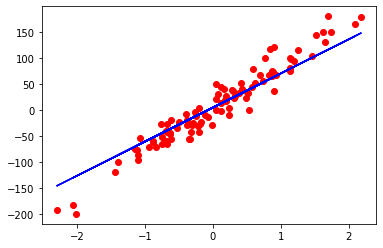

In [58]:
num_epochs=100
for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(X)
  loss=criterion(y_predicted, y)

  #backward pass
  loss.backward()

  #update
  optimizer.step()

  #empty gradients
  optimizer.zero_grad()

  #print some info every tenth epoch
  if (epoch +1)%10 ==0:
    print(f"epoch: {epoch + 1}, loss= {loss.item():.3f}") #cut at 3 decimal values
  

#plot values:
predicted=model(X).detach().numpy() #must detach as this tensor has gradients set to true
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted,"b")
plt.show()

#Logistic regression

this is an example of a logistic regression model in pytorch

step 1) load and prerpare the data

In [59]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
breast_cancer=datasets.load_breast_cancer()
X,y=breast_cancer.data,breast_cancer.target

In [61]:
n_sampless, n_features=X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [62]:
#scale data
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

# convert to torch tensors:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [63]:
#reshape y
y_train = y_train.view(y_train.shape[0],1) #want to make y into a column, vector
y_test =y_test.view(y_test.shape[0],1)

prepare the model using the logistic regression function

In [64]:
class LogisticRegression(nn.Module):

  def __init__(self,input_features):
    super(LogisticRegression, self).__init__()
    self.linear=nn.Linear(input_features,1)

  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

#instantiate an instance of the model
model=LogisticRegression(n_features)

define optimizer and loss functions

In [65]:
criterion = nn.BCELoss() #binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


main training loop:

In [66]:
num_epochs=100

for epoch in range(num_epochs):
  #forward pass
  y_predicted=model(X_train)
  loss=criterion(y_predicted,y_train)
  #backward pass
  loss.backward()

  #update weights
  optimizer.step()

  #empty weights
  optimizer.zero_grad()

  #print info:
  if (epoch + 1) %10 ==0:
    print(f"epoch: {epoch + 1}, loss= {loss.item():.3f}") #cut at 3 decimal values


epoch: 10, loss= 0.592
epoch: 20, loss= 0.481
epoch: 30, loss= 0.413
epoch: 40, loss= 0.366
epoch: 50, loss= 0.332
epoch: 60, loss= 0.306
epoch: 70, loss= 0.285
epoch: 80, loss= 0.268
epoch: 90, loss= 0.254
epoch: 100, loss= 0.242


evaluate performance of model

In [67]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  accuracy=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy: {accuracy: .3f}')

accuracy:  0.904


#Pytorch Datatests and DataLoader Classes

going over some terminology: 

epoch: 1 forward and backward pass of ALL training samples

batch_size: number of training samples in one forward and backward pass

number of iterations: number of apsses, each pass using [batch_size] number of samples




In [68]:
#import needed modules
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


start implementing our own custom dataset:

In [69]:
class WineDataset(Dataset):

  def __init__(self):
    #data loading
    xy=np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv', 
                  delimiter=',',dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]]) #n_samples, 1
    self.n_samples =xy.shape[0]

  def __getitem__(self, index):
    #allows you to get data by the index
    #dataset[0]
    return self.x[index], self.y[index]
  
  def __len__(self):
    #get len of dataset
    return self.n_samples
  

In [70]:
#get dataset:
dataset=WineDataset()
first_data=dataset[0]
features, labels=first_data
print(features,labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


this is how we get a dataset. Now let's see how we use a dataloader

In [71]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [72]:
dataiter=iter(dataloader)
data = dataiter.next()
features,labels=data
print(features, labels)

tensor([[1.2370e+01, 9.4000e-01, 1.3600e+00, 1.0600e+01, 8.8000e+01, 1.9800e+00,
         5.7000e-01, 2.8000e-01, 4.2000e-01, 1.9500e+00, 1.0500e+00, 1.8200e+00,
         5.2000e+02],
        [1.3390e+01, 1.7700e+00, 2.6200e+00, 1.6100e+01, 9.3000e+01, 2.8500e+00,
         2.9400e+00, 3.4000e-01, 1.4500e+00, 4.8000e+00, 9.2000e-01, 3.2200e+00,
         1.1950e+03],
        [1.3490e+01, 3.5900e+00, 2.1900e+00, 1.9500e+01, 8.8000e+01, 1.6200e+00,
         4.8000e-01, 5.8000e-01, 8.8000e-01, 5.7000e+00, 8.1000e-01, 1.8200e+00,
         5.8000e+02],
        [1.3360e+01, 2.5600e+00, 2.3500e+00, 2.0000e+01, 8.9000e+01, 1.4000e+00,
         5.0000e-01, 3.7000e-01, 6.4000e-01, 5.6000e+00, 7.0000e-01, 2.4700e+00,
         7.8000e+02]]) tensor([[2.],
        [1.],
        [3.],
        [3.]])


In [73]:
#iterate over whole data loader
#training loop:
num_epochs=2
total_samples=len(dataset)
n_iterations= math.ceil(total_samples/4)
print(total_samples, n_iterations)

178 45


In [74]:
#dummy training loop:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    #forward and backward pass, update weights
    if (i+1)%5 ==0:
      print(f"epoch {epoch+1}/{num_epochs}, step{i+1}/{n_iterations},inputs={inputs.shape}")

epoch 1/2, step5/45,inputs=torch.Size([4, 13])
epoch 1/2, step10/45,inputs=torch.Size([4, 13])
epoch 1/2, step15/45,inputs=torch.Size([4, 13])
epoch 1/2, step20/45,inputs=torch.Size([4, 13])
epoch 1/2, step25/45,inputs=torch.Size([4, 13])
epoch 1/2, step30/45,inputs=torch.Size([4, 13])
epoch 1/2, step35/45,inputs=torch.Size([4, 13])
epoch 1/2, step40/45,inputs=torch.Size([4, 13])
epoch 1/2, step45/45,inputs=torch.Size([2, 13])
epoch 2/2, step5/45,inputs=torch.Size([4, 13])
epoch 2/2, step10/45,inputs=torch.Size([4, 13])
epoch 2/2, step15/45,inputs=torch.Size([4, 13])
epoch 2/2, step20/45,inputs=torch.Size([4, 13])
epoch 2/2, step25/45,inputs=torch.Size([4, 13])
epoch 2/2, step30/45,inputs=torch.Size([4, 13])
epoch 2/2, step35/45,inputs=torch.Size([4, 13])
epoch 2/2, step40/45,inputs=torch.Size([4, 13])
epoch 2/2, step45/45,inputs=torch.Size([2, 13])


#Dataset Transforms!

we will see how to write a custom class to transform our data

Gathering data and code from the previous section, we can skip transforming X and Y in tensors and write separate methods especially for that:



In [75]:
class ToTensor:

  """A class that handles data transformations into tensors"""

  def __call__(self, sample):
    """This special dunder method makes this a callable object"""
    inputs,targets=sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)


We need to modify the dataclass to use this transform class.

To do this, add a parameter "transform" in its init method and eliminate the .from_numpy method:


In [76]:
class WineDataset(Dataset):

  def __init__(self, transform=None):#added transform parameter
    #data loading
    xy=np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv', 
                  delimiter=',',dtype=np.float32, skiprows=1)
    self.x = xy[:,1:]#modified here
    self.y=xy[:,[0]] # and here n_samples, 1
    self.n_samples =xy.shape[0]
    self.transform=transform

  def __getitem__(self, index):
    #allows you to get data by the index
    #dataset[0]
    sample=self.x[index], self.y[index] #apply the transformation
    if self.transform:
      sample=self.transform(sample)
      return sample
  
  def __len__(self):
    #get len of dataset
    return self.n_samples
  

In [77]:
#apply this transoformation to our dataset
dataset = WineDataset(transform=ToTensor())

In [78]:
first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels)) #data has been transformed into a tensor

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [79]:
dataset = WineDataset(transform=None)
first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels))#if we don't pass this optional parameter our data is still in the shape of a numpy array

TypeError: ignored

lets try implementing a new class:


In [80]:
class MulTransform:
  """Multiplication transform"""

  def __init__(self, factor):
    self.factor=factor

  
  def __call__(self, sample):
    """This special dunder method makes this a callable object"""
    inputs,target=sample
    inputs *= self.factor #multiplication transform
    return inputs, target
    

In [81]:
#apply this new transform


#compose to transforms together by using the compose method and putting them into a list
composed= torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)

first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels))
print(features)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])


#Softmax and crossentropy

useful concept to preproces images, like turning them into gray scale and preprocessing them

In [82]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x=np.array([2.0,1.0, 0.1])
outputs=softmax(x)
print('softmax  numpy', outputs)

softmax  numpy [0.65900114 0.24243297 0.09856589]


In [ ]:
x=torch.tensor([2.0, 1.0, 0.1])
outputs=torch.softmax(x, dim=0)
print(outputs)#reuslt is almost the same

In [ ]:
def cross_entropy(actual, predicted):
  loss=-np.sum(actual * np.log(predicted))
  return loss

In [ ]:
#y must be one hot encoded
y=np.array([1,0,0])

Y_pred_good=np.array([0.7, 0.2, 0.1])
Y_pred_bad=np.array([0.1, 0.3, 0.6])
l1=cross_entropy(y, Y_pred_good)
l2=cross_entropy(y, Y_pred_bad)
print(f"Loss1 numpy:{l1: 4f}")
print(f"Loss2 numpy:{l2: 4f}")

lets see how we can do this in pytorch

In [ ]:
loss=nn.CrossEntropyLoss()
#Y no softmax in last layer, y_class has labels so no One hot encode!
#Y_pred has raw scores (logits) no softmax!

In [ ]:
Y=torch.tensor([0])
#n samples x nlcasses
Y_pred_good=torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad=torch.tensor([[0.5, 3.0, 0.3]])

In [ ]:
l1=loss(Y_pred_good,Y)
l2=loss(Y_pred_bad,Y)

In [ ]:
print(l1.item(), l2.item())

In [ ]:
_,predictions1=torch.max(Y_pred_good,1)
_,predictions2=torch.max(Y_pred_bad,1)
print(predictions1, predictions2)

simple template on how to create an image classifier model with crossentropy:

In [ ]:
#Multiclass problems:
class NeuralNet2(nn.Module):
  
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2=nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out=self.linear(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    return out

model=NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion=nn.CrossEntropyLoss() #applies softmax

#Activation functions in Pytorch
common activations functions:
1)step function

2)Sigmoid

3)Tanh

4)ReLU

5)LeakyReLU

6)Softmax


The stepnfunctions is o for all vlaues of x smaller than 0 and 1 for all vlaues of x greater than 0. It is not used that much in practice:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Step_function.svg/1020px-Step_function.svg.png'>


The sigmoid (or binary function) used for classification. Is a better version of the step function.
The formula is f= 1/(1-e^(-x))

It is typically used for binary classification:

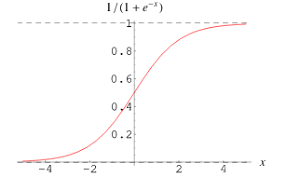

Next we have the hyperbolic tanh function defined by:
f(x) = 2/(1+e^(-2x) -1

is basically a scaled and slightly shifted sigmoid function.
It will output a value between -1 and 1.It is a good choice of function for the hidden layers:
<img src='https://miro.medium.com/max/1190/1*f9erByySVjTjohfFdNkJYQ.jpeg'>


the fourht function is the ReLU function. 0 when x is less than 0 and x when x is greater than 0. Is the most popular choice for hidden layers in a network. When you don't know whatto use, just use a ReLU for a hidden layer!

<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png">


then we also have the leaky relu. It's a slightly imporved version of the ReLu. It tries to solve the vanishing gradient problem.
it is equal to x if x is greater than 0 or a*x if x is less than 0, a being a small positive number.
It solves the vaninishing gradient because gby not being 0 after a certain point it ensures that also the gradient is nonzero during the backpropagations step. So it ensures that the weights will be correctly update.

Finally we have the Softmax (we have already seen it). It wills quash teh inputs and the outputs to be between 0 and 1.It is typically a good chocie for the last alyer in a MULTI CLASSIFICATION problem

we have two options to write the activation layers in our nn model:


In [ ]:
#option one:

class Neuralnet(nn.Module):
  
  """for binary classification"""

  def __init__(self, input_size, hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1 =nn.Linear(input_size, hidden_size)
    self.relu==nn.ReLU()
    self.linear2 =nn.Linear(hidden_size,1)
    self.sigmoid=Sigmoid()

  def forward(self, x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    self.sigmoid(out)
    return out

In [ ]:
#option two: Use activation functions direclty in the 
#forward pass

class Neuralnet(nn.Module):
  
  """for binary classification"""
  
  def __init__(self, input_size, hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1 =nn.Linear(input_size, hidden_size)
    self.linear2 =nn.Linear(hidden_size,1)
    

  def forward(self, x):
    out=torch.relu(self.linear1(x)) #call activation functions directly here
    out=torch.sigmoid(self.linear2(out))
    return out

#if some functions aren't directly available in torch use the functional api:
#import torch.nn.functional as F  so torch.relu becomes F.leaky_relu()


#Feed forward Neural Net
Putting everything we have learnt together to create a neural net based on the mnist dataset. We will cover:

-MNIST
-DataLoader and Transformation

-Multilayer Neural Net, activation Function

-Loss and Optimizer

-Training Loop (batch training)

-Model evaluation

-GPU support

In [83]:
#import the relevant libraries:
import torch
import torch.nn as nn
import torchvision #for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [84]:
#device configurations if we have a gpu, will guarantee that tensors will be pushed to gpu if we have it
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [85]:
#define some hyperparameters
input_size=784 #as img size is 28*28 =784, need to flatten them as a 1d tensor
hidden_size=100
num_classes=10 #digits from 0 to 9
num_epochs=2
batch_size=100
learning_rate=0.001

In [86]:
#load the MNIST data:
train_dataset=torchvision.datasets.MNIST(root="./data", train=True,
                                         transform= transforms.ToTensor(), download=True)

In [87]:
#do the same thing for test dataset
test_dataset=torchvision.datasets.MNIST(root="./data", train=False,
                                         transform= transforms.ToTensor())

load the training and the testing data

In [88]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [89]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset, 
                                        batch_size=batch_size, shuffle=False)

In [90]:
#look at a sample of the data
examples=iter(train_loader)
samples, labels= examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


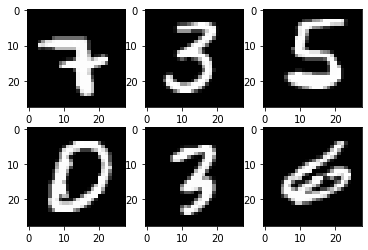

In [91]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap="gray")
plt.show()

create the classification NN

In [92]:
class NeuralNet(nn.Module):
  
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    #create layers
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    #don't want softmax, will appy x entropy here that will do the softmax for us
    return out

instantiate the nn objects and configure the loss and optimizer functions

In [95]:
model= NeuralNet(input_size, hidden_size, num_classes)
criterion=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=learning_rate)

create the main training loop

In [96]:
#training loop
n_total_steps=len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #reshape images 100 28 28
    #want to reshape to 784
    images=images.reshape(-1,28*28).to(device)#flatten iamge
    labels=labels.to(device)#push tensors to gpu

    #forward pass:
    outputs=model(images)
    loss=criterion(outputs,labels)

    #backward pass
    optimizer.zero_grad() #empty gradients
    loss.backward()
    optimizer.step()


    #print info every 100 step
    if (i+1)%100 ==0:
      print(f"epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item() :.3f}")



epoch 1/2, step 100/600, loss = 0.440
epoch 1/2, step 200/600, loss = 0.382
epoch 1/2, step 300/600, loss = 0.197
epoch 1/2, step 400/600, loss = 0.150
epoch 1/2, step 500/600, loss = 0.114
epoch 1/2, step 600/600, loss = 0.328
epoch 2/2, step 100/600, loss = 0.154
epoch 2/2, step 200/600, loss = 0.125
epoch 2/2, step 300/600, loss = 0.173
epoch 2/2, step 400/600, loss = 0.161
epoch 2/2, step 500/600, loss = 0.205
epoch 2/2, step 600/600, loss = 0.151


test the model

In [98]:
#test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    #reshape images like before and push to device
    images=images.reshape(-1,28*28).to(device)#flatten iamge
    labels=labels.to(device)#push tensors to gp
    outputs=model(images)

    _, predictions = torch.max(outputs, 1) #returns the value and index (class label)
    n_samples= labels.shape[0] #no of samples in current batch should be 100
    n_correct = (predictions == labels).sum().item()

  acucracy=100.0* n_correct/n_samples
  print(f"accuracy: {accuracy}")

accuracy: 0.9035087823867798
